In [65]:
workers()

8-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8
 9

In [2]:
addprocs(8);

In [66]:
workers()

8-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8
 9

In [67]:
@everywhere begin
    push!(LOAD_PATH,"./src/")
    import nbody
    reload("nbody")
    nb = nbody;
end

n => {0,262144,0,0,0,0}
m => [0.0,32.70537839355947,0.0,0.0,0.0,0.0]
t = read(f,Float64) => 0.0196078431372549
z = read(f,Float64) => 50.0
z => 50.0
t => 0.0196078431372549


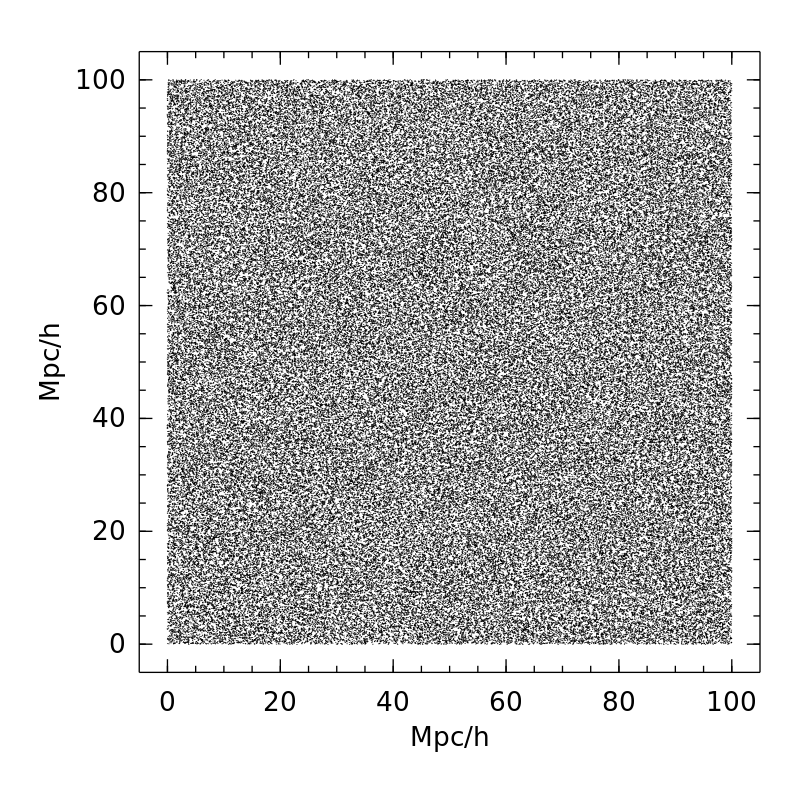

In [68]:
w = nb.load_G2("/home/skariel/Desktop/N-GenIC/ICs/ics");
using Winston
hold(false)
Winston.set_default_plot_size(800,800)
nb.plot(w)

In [69]:
#w = nb.filter_r(w, 15297.5);
nw = nb.filter_r(w, 30631.9)
#nw = nb.filter_r(w, 50000.0);
@show nw.n;
nw.opening_alpha2 = 0.5
nw.smth2 = 1000.0^2;
sim = nb.Simulation(deepcopy(nw), limit_by_steps=false, stepc=1, ti=0.0196078431372549, tf=0.5, n_test_particle=3*nw.n);

smth = sqrt(w.smth2) => 0.2
opening_alpha = sqrt(w.opening_alpha2) => 0.5
dtfrac = w.dtfrac => 0.35
space = typeof(w.space) => Cosmological
Ω0 = w.Ω0 => 0.3089
ΩΛ = w.ΩΛ => 0.6911
nw.n => 31874


s=1 t=0.0196078431372549 dt=0.018638143999949685 /0.217078405s
s=2 t=0.03824598713720459 dt=0.027545101115392115 /0.157696191s
s=3 t=0.0657910882525967 dt=0.037063271396630446 /0.244547196s
s=4 t=0.10285435964922715 dt=0.0477584325885759 /0.159582553s
s=5 t=0.15061279223780305 dt=0.05 /0.240349123s
s=6 t=0.20061279223780304 dt=0.05 /0.209045178s
s=7 t=0.25061279223780303 dt=0.05 /0.171879081s
s=8 t=0.3006127922378031 dt=0.05 /0.257209497s
s=9 t=0.3506127922378031 dt=0.05 /0.250625927s
s=10 t=0.40061279223780316 dt=0.05 /0.179633283s
s=11 t=0.4506127922378032 dt=0.049387207762196794 /0.252963726s

--- Done!

elapsed time: 2.546451979 seconds


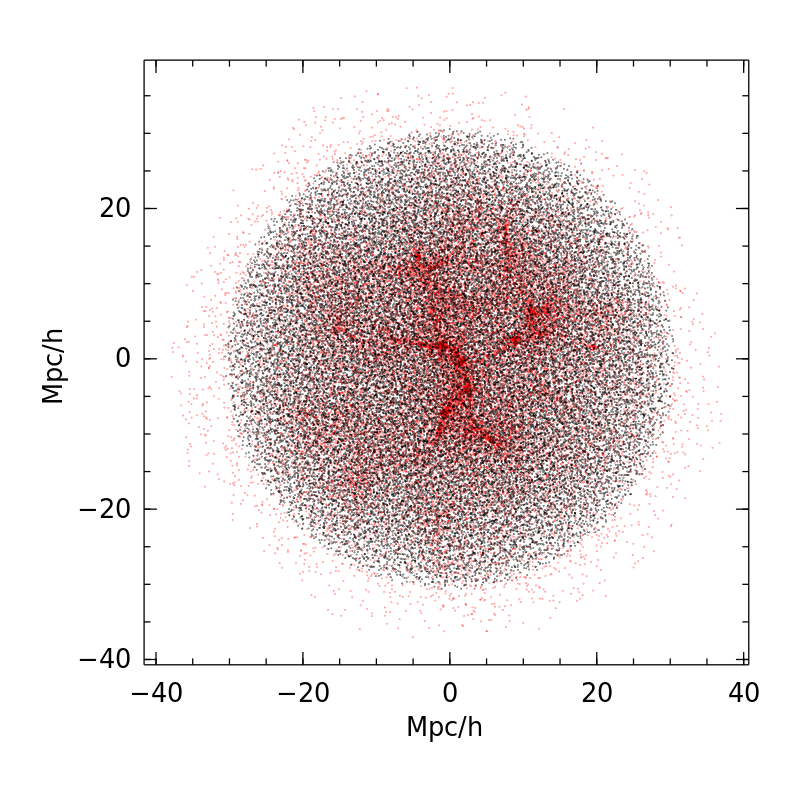

In [70]:
nb.exec!(sim, false)
nb.plot(sim)

In [71]:
nsim = nb.load_sim("out.sim");

tn => 95622


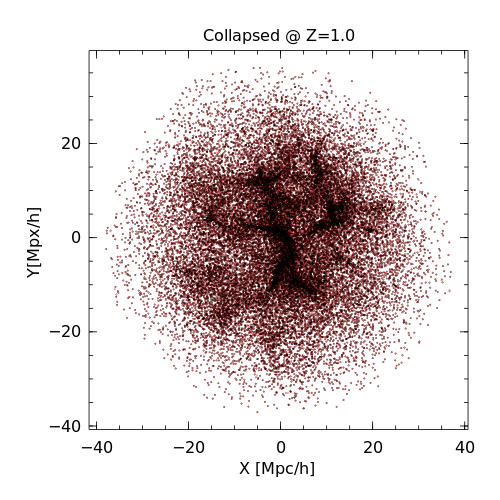

In [72]:
using Winston
Winston.set_default_plot_size(500,500)
hold(false)
p1 = scatter([p._x/1000.0 for p in nsim.w.particles], [p._y/1000.0 for p in nsim.w.particles], 0.02, aspect_ratio=1, color="red")
hold(true)
scatter([p._x/1000.0 for p in sim.w.particles], [p._y/1000.0 for p in sim.w.particles], 0.02, aspect_ratio=1, color="black")
title("Collapsed @ Z=1.0")
xlabel("X [Mpc/h]")
ylabel("Y[Mpx/h]")

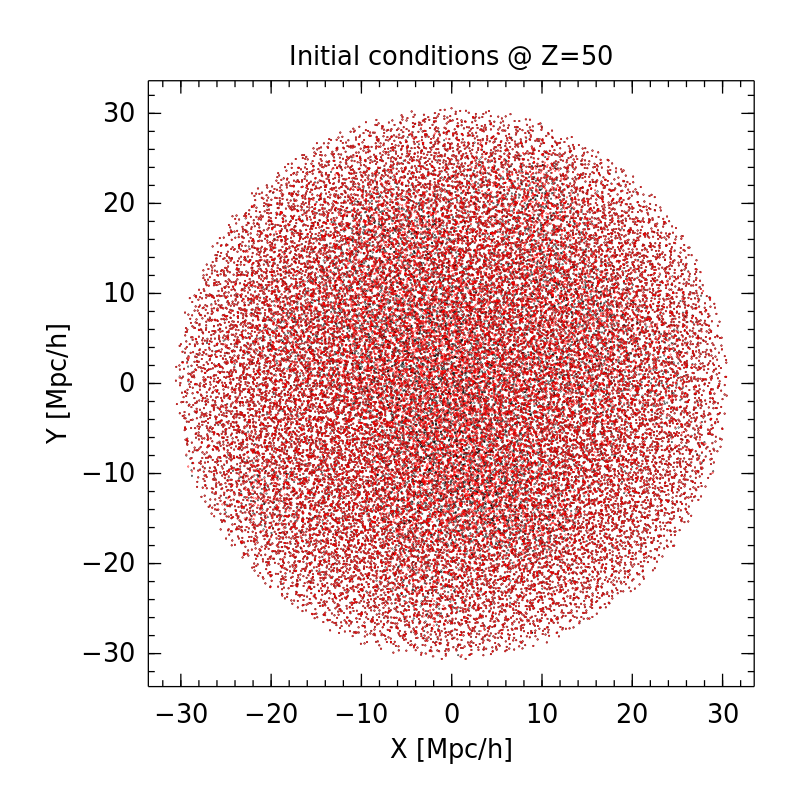

In [73]:
using Winston
Winston.set_default_plot_size(800,800)
hold(false)
p2 = scatter(sim.xi/1000.0, sim.yi/1000.0, 0.03, aspect_ratio=1, color="black")
hold(true)
scatter(nsim.xi/1000.0, nsim.yi/1000.0, 0.03, aspect_ratio=1, color="red")
title("Initial conditions @ Z=50")
xlabel("X [Mpc/h]")
ylabel("Y [Mpc/h]")

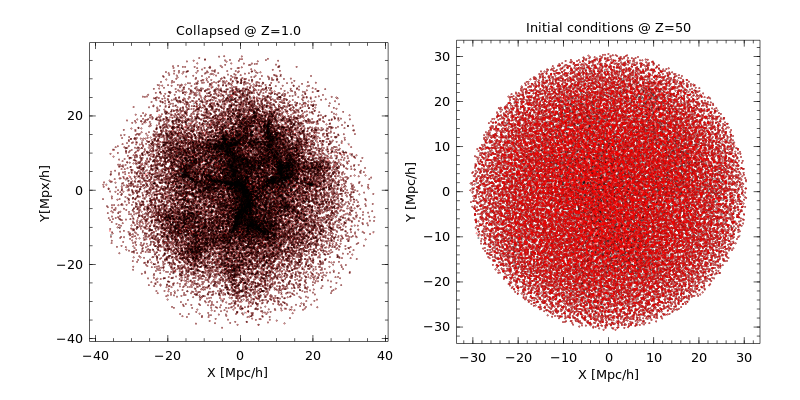

In [74]:
Winston.set_default_plot_size(800,400)
hold(false)
t = Table(1,2)
t[1,1] = p1
t[1,2] = p2
display(t)

In [75]:
dx = sim.xi .- nsim.xi
dy = sim.yi .- nsim.yi
dz = sim.zi .- nsim.zi
d2 = dx.*dx+dy.*dy+dz.*dz
d = sqrt(d2)
mean(d)

487.2235520059042

In [76]:
dx = Float64[sim.w.particles[i]._x - nsim.w.particles[i]._x for i in 1:sim.w.n]
dy = Float64[sim.w.particles[i]._y - nsim.w.particles[i]._y for i in 1:sim.w.n]
dz = Float64[sim.w.particles[i]._z - nsim.w.particles[i]._z for i in 1:sim.w.n]
d2 = dx.*dx+dy.*dy+dz.*dz
d = sqrt(d2)
mean(d)

132.3347324222048

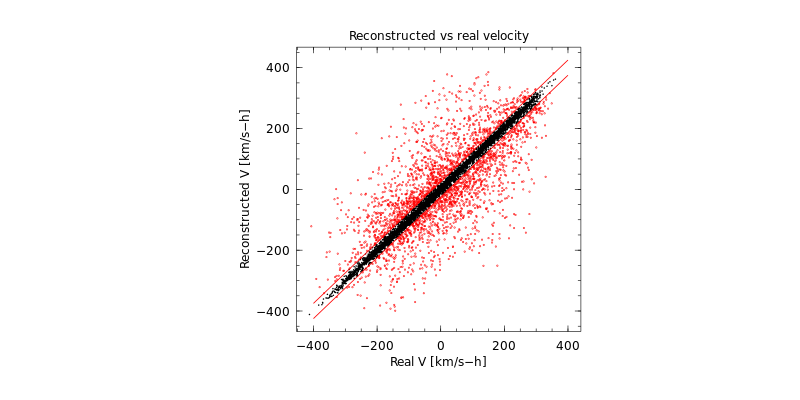

In [88]:
hold(false)
ix = find(abs(sim.w.vx-nsim.w.vx).<=25.0);
p1=scatter(sim.w.vx[ix], nsim.w.vx[ix], 0.01, aspect_ratio=1.0)
title("Reconstructed vs real velocity")
xlabel("Real V [km/s-h]")
ylabel("Reconstructed V [km/s-h]")
hold(true)
plot([-400,400],[-375,425],"red")
plot([-400,400],[-425,375],"red")
ix = find(abs(sim.w.vx-nsim.w.vx).>25.0);
scatter(sim.w.vx[ix], nsim.w.vx[ix], 0.07, aspect_ratio=1.0, color="red")

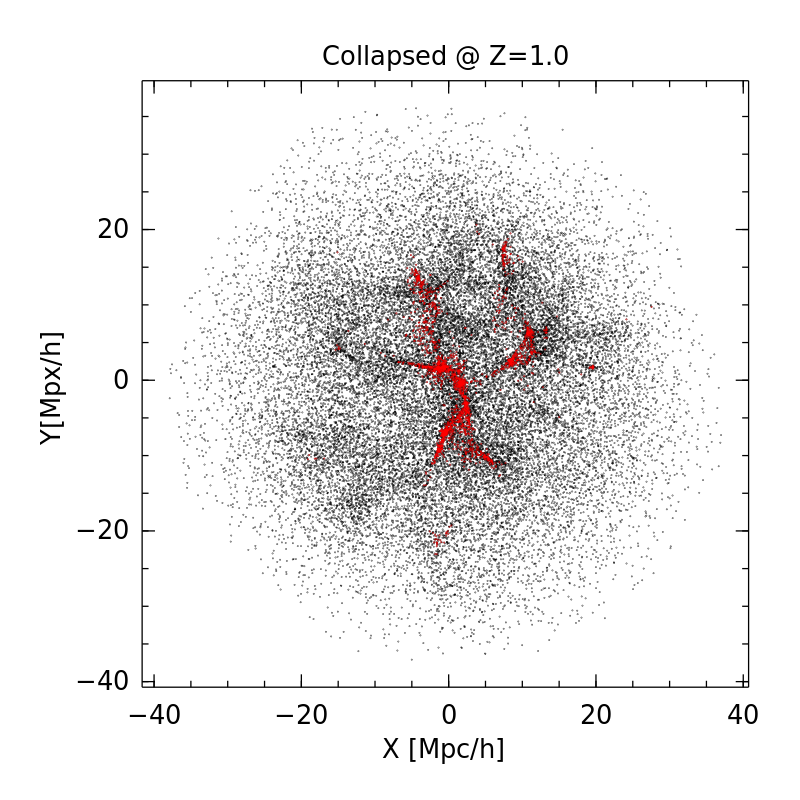

In [89]:
hold(false)
Winston.set_default_plot_size(800,800)
p2=scatter([p._x/1000.0 for p in nsim.w.particles], [p._y/1000.0 for p in nsim.w.particles], 0.02, aspect_ratio=1, color="black")
hold(true)
scatter([p._x/1000.0 for p in nsim.w.particles[ix]], [p._y/1000.0 for p in nsim.w.particles[ix]], 0.02, aspect_ratio=1, color="red")
title("Collapsed @ Z=1.0")
xlabel("X [Mpc/h]")
ylabel("Y[Mpx/h]")

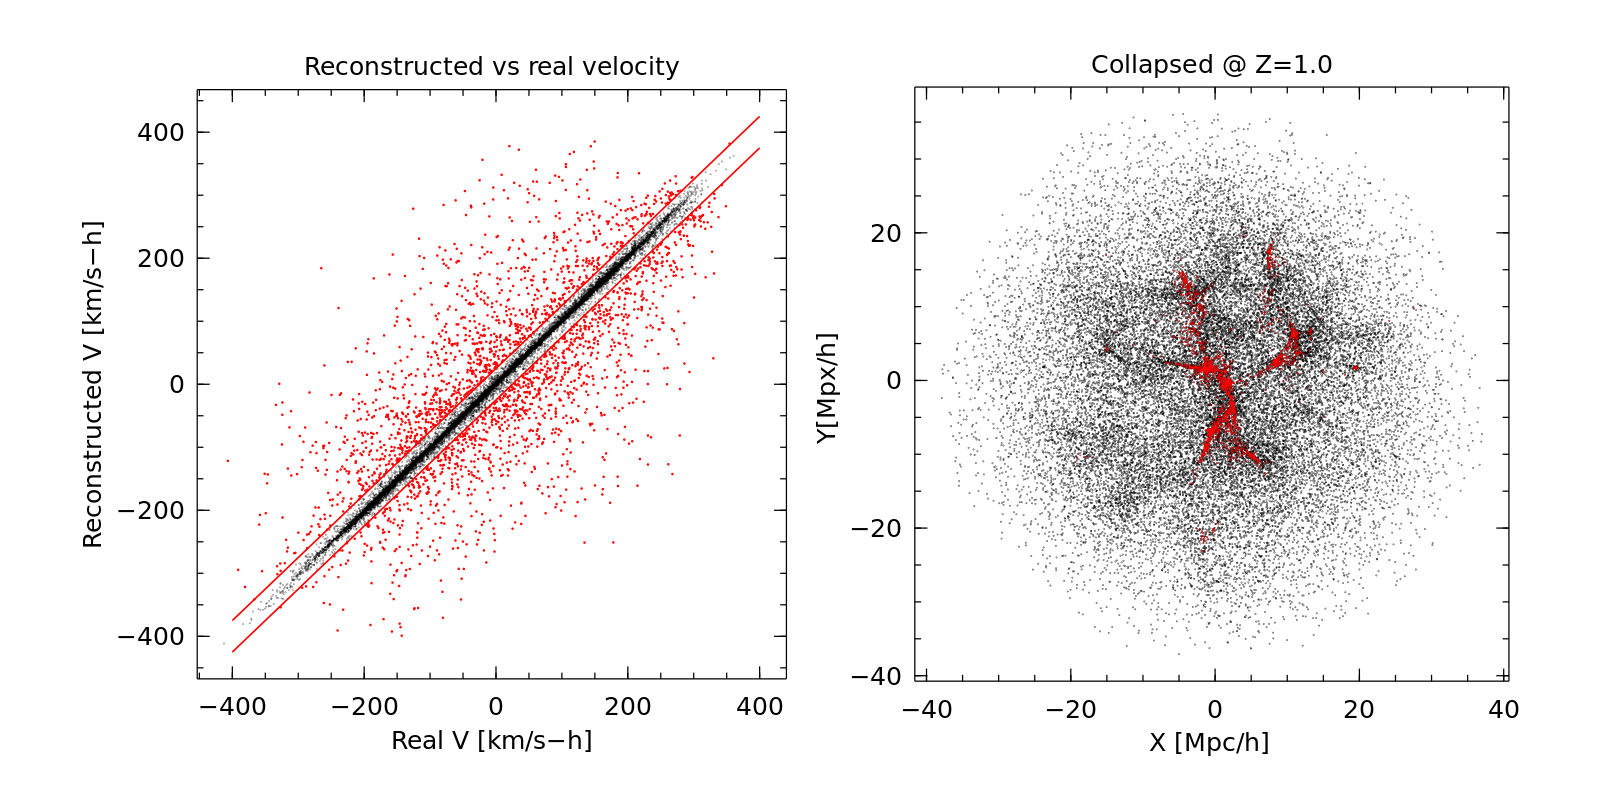

In [91]:
Winston.set_default_plot_size(1600,800)
hold(false)
t = Table(1,2)
t[1,1] = p1
t[1,2] = p2
display(t)